# Titanic Survival Prediction Dataset
---

### Importing Libraries and Required Utilities

In [1]:
# Data Wrangling Libraries
import numpy as np
import pandas as pd

# Data Visualizing Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Utility Functions
from sklearn.model_selection import train_test_split

# Classifying Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Loading Data for Training

In [2]:
# Add both training and testing data
data = pd.read_csv('data/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Visualizing

Visualizing the dataset using histograms.

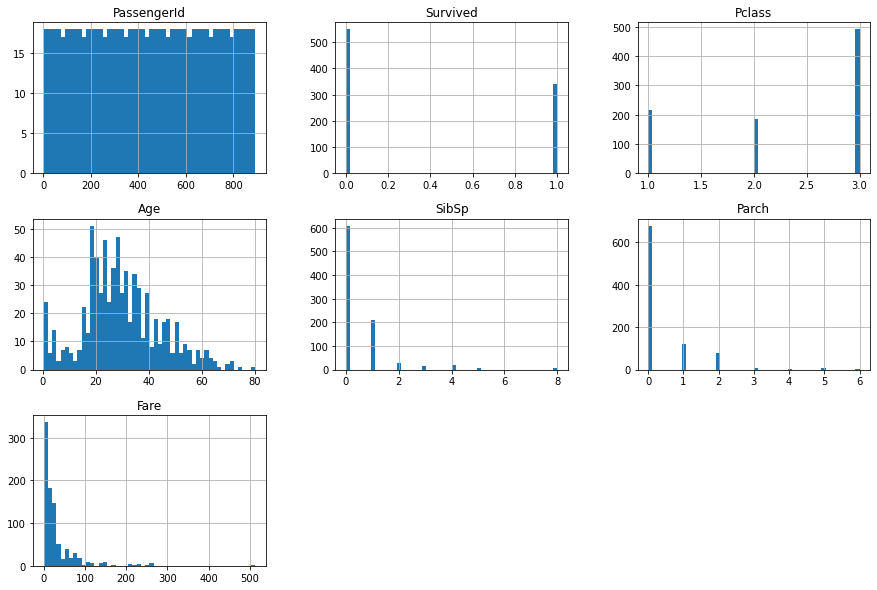

In [3]:
_ = data.hist(bins=50, figsize=(15,10))

Analyzing the correlation between the various columns within our dataset

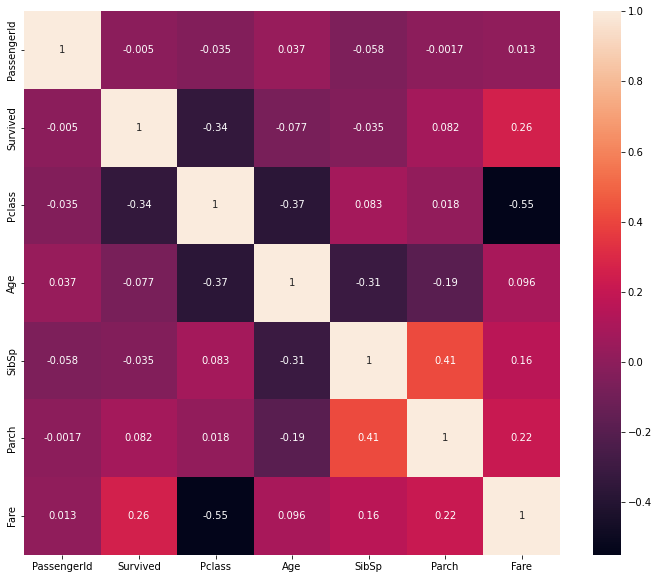

In [4]:
fig, ax = plt.subplots(figsize=(12,10))
_ = sns.heatmap(data.corr(), annot=True, ax=ax)

### Cleaning & Preparing Data for Machine Learning Algorithms 

Identifying and Removing Unnecessary/Irrelevant Information. We will first attempt to remove any duplicate entries within the dataset.

In [5]:
data.drop_duplicates()
data.shape

(891, 12)

Now we will be removing/replacing any null values within our dataset

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that the `Cabin` numbers have a lot of missing values (over half of it is missing), and they only indicate which cabins each passengers stayed in. So, will be removing them from further considerations when building our models. 

In [7]:
data.drop('Cabin', axis=1, inplace=True)

Now we will be taking a look at the `Age` column. We can see that there are a number of missing values within that column. However, we will not be removing that column, as passenger ages may be a contributing factor to their survivability. So, we will be replacing the missing ages with the mean of existing ages instead.

In [8]:
data['Age'].fillna(data['Age'].mean(), inplace=True)

From our initial viewing, we can see that our dataset contains two rows with missing `Embarked` values. We will be replacing these values with the mode of the `Embarked` column.

In [9]:
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

We now have no duplicate or missing values.

In [10]:
print('Null Values:')
print(data.isnull().sum())
print()
print('rows x cols =', data.shape)
print('number of duplicate rows:', data.duplicated().sum())

Null Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

rows x cols = (891, 11)
number of duplicate rows: 0


We will now be removing the `Name`, the `PassengerID` & the `Ticket` columns from our dataset as the names of the passengers is not relevant for calculating the probability of their survivability. 

In [11]:
data.drop(columns=['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
print('Unique entries in Sex Column:', data['Sex'].unique())
print('Unique entries in Embarked Column:', data['Embarked'].unique())

Unique entries in Sex Column: ['male' 'female']
Unique entries in Embarked Column: ['S' 'C' 'Q']


We will also be replacing the values of `Sex` and `Embarked` columns to ones that are more easily understood by Machine Learning algorithms (i.e. to numbers).\
So, for `Sex` column, `male = 0` & `female = 1` are the replacements and for the `Embarked` column, `C = 0`, `Q = 1`, `S = 2` are the replacements.

In [13]:
data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'C': 0, 'Q': 1, 'S': 2}}, inplace=True)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


Finally, we will now be separating our training set from our testing set and will also seperate the targets and features from the dataset. The `Survived` column is our target, and the rest are our features for training the Algorithms.

In [14]:
# Seperating Training data & Testing data
train, test = train_test_split(data, train_size=0.8, random_state=1, shuffle=True)

# Seperating the target from the features
train_x = train.drop('Survived', axis=1)
train_y = train['Survived']

test_x = test.drop('Survived', axis=1)
test_y = test['Survived']

### Model Training & Testing

* **Logistic Regression**:


In [15]:
logistic_regressor = LogisticRegression(max_iter=800)
logistic_regressor.fit(train_x, train_y)

f'Logistic Regression Classifier Test Accuracy = {logistic_regressor.score(test_x, test_y) * 100:0.2f}%'

'Logistic Regression Classifier Test Accuracy = 79.89%'

* **Naive Bayes Classifier**:

In [16]:
nb_classifier = GaussianNB()
nb_classifier.fit(train_x, train_y)

f'Naive Bayes Classifier Test Accuracy = {nb_classifier.score(test_x, test_y) * 100:0.2f}%'

'Naive Bayes Classifier Test Accuracy = 75.98%'

* **K-Nearest Neighbors Classifier**:

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=7)
knn_classifier.fit(train_x, train_y)

f'KNN Classifier Test Accuracy = {knn_classifier.score(test_x, test_y) * 100:0.2f}%'

'KNN Classifier Test Accuracy = 72.07%'

* **Random Forest Classifier**:

In [18]:
rnd_forest_classifier = RandomForestClassifier()
rnd_forest_classifier.fit(train_x, train_y)

f'Random Forest Classifier Test Accuracy = {rnd_forest_classifier.score(test_x, test_y) * 100:0.2f}%'

'Random Forest Classifier Test Accuracy = 77.09%'

* **Decision Tree Classifier**:

In [19]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(train_x, train_y)

f'Decision Tree Classifier Test Accuracy = {dt_classifier.score(test_x, test_y) * 100:0.2f}%'

'Decision Tree Classifier Test Accuracy = 74.86%'

From our above observations, we can see that the Logistic Regression is performing the best out of all the classification algorithms. As such, we will be selecting it for the following testing and predicting phases.

### Kaggle Submission

Reading Submission Files

In [20]:
submission_data = pd.read_csv('data/titanic/test.csv')
submission_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Cleaning and replacing missing values, just as before

In [21]:
submission_data_features = submission_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
submission_data_features.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'C': 0, 'Q': 1, 'S': 2}}, inplace=True)
submission_data_features.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [22]:
submission_data_features['Age'].fillna(submission_data_features['Age'].mean(), inplace=True)
submission_data_features['Fare'].fillna(submission_data_features['Fare'].mean(), inplace=True)

In [23]:
predicted = logistic_regressor.predict(submission_data_features)
results = pd.DataFrame({'PassengerId':submission_data['PassengerId'], 'Survived': predicted})
results.to_csv('out/titanic.csv', sep=',', encoding='utf-8', index=False)

Final Result from Kaggle Submission

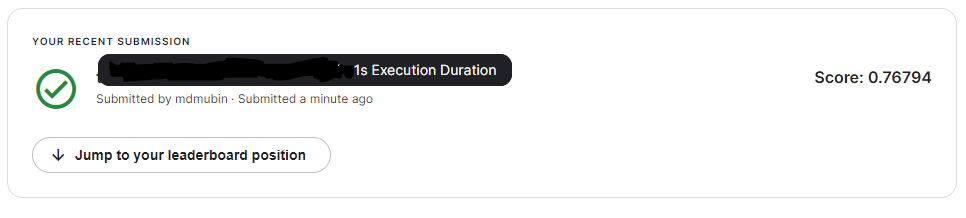